<a href="https://colab.research.google.com/github/FredArgoX/ChaoticTest_DataX/blob/main/ChaoticTest_PolyRegres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Polynomial Regression [Iteration 01]

In [ ]:
# Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
# Define feature (X) and target(y)
X = 6 * np.random.rand(200, 1) - 3
y = (0.8 * X**2) + (0.9 * X) + 2 + np.random.randn(200,1)

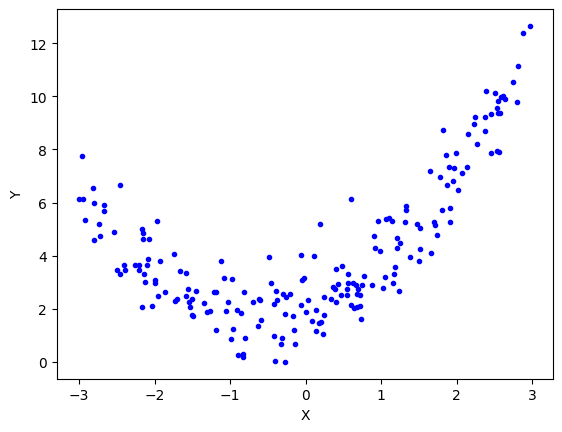

In [ ]:
# Visualize y(X)
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Simple linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.25717533446838203


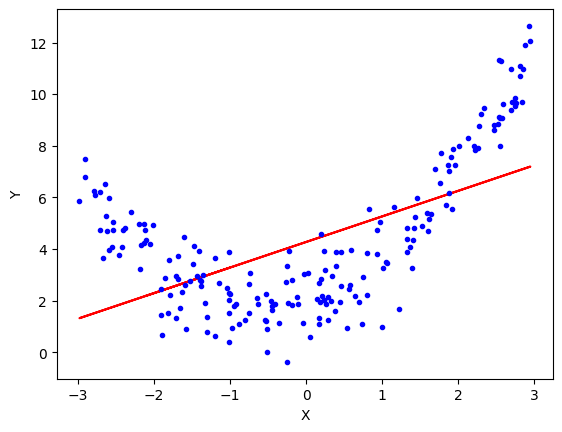

In [ ]:
# Visualize Linear regression
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# As Linear regression is not a fit, let's try Polynomial Regression

# Applying polynomial regression
# Degree chosen: 2
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply lienar regression to transformed X
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_pred = lr.predict(X_test_poly)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.8675441943599023


In [ ]:
lr.coef_

array([[0.        , 0.88139535, 0.80295669]])

In [ ]:
lr.intercept_

array([2.01238026])

$\hat{y} \approx 2.012 + 0.881X + 0.803X^2$

<ipython-input-27-8fe56a36101d>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  equation_plot_points.append(float(y))


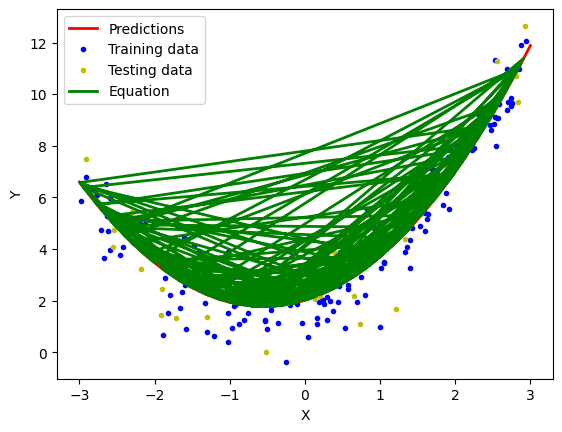

In [ ]:
# NOT OK
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# Visualize polynomial regression
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

# ------------------------------------------------------------
#y_equation = 2.012 + 0.881*X_new + 0.803*X_new**2
#y_equation = (lr.intercept_[0] + (lr.coef_[0][1]*X) + (lr.coef_[0][2]*X**2))
equation_plot_points = []
for x_point in X:
  y = lr.intercept_[0] + (lr.coef_[0][1]*x_point) + (lr.coef_[0][2]*x_point**2)
  equation_plot_points.append(float(y))
# ------------------------------------------------------------

plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'b.', label='Training data')
plt.plot(X_test, y_test, 'y.', label='Testing data')

plt.plot(X, equation_plot_points, 'g-', linewidth=2, label='Equation')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [ ]:
# YES
X_list = []
for x in X:
  X_list.append(x[0])

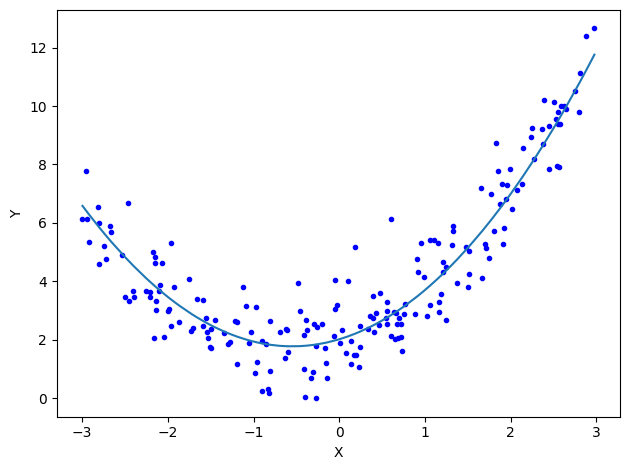

In [ ]:
plt.plot(X_list, y, 'b.')




#y_equation = 2.012 + 0.881*X_new + 0.803*X_new**2
#y_equation = (lr.intercept_[0] + (lr.coef_[0][1]*X) + (lr.coef_[0][2]*X**2))
equation_plot_points = []
for x_point in X_list:
  yp = float(lr.intercept_[0]) + (float(lr.coef_[0][1])*x_point) + (float(lr.coef_[0][2])*x_point**2)
  equation_plot_points.append(float(yp))

equation_plot_points

#plt.plot(X, equation_plot_points, 'g.')
data = pd.DataFrame({'X': X_list, 'equation_plot_points': equation_plot_points})
sns.lineplot(x=X_list, y=equation_plot_points, data=data)




plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

# Univariate Polynomial Regression [Iteration 02]

In [ ]:
# Create a data disctionary
data = {
    'target': [-1,3,2.5,5,4,2,5,4,6,7,6,7,8,7,6,5,4],
    'variable01': [-1,0,1,2,3,5,7,9,10,11,12,13,14,15,16,17,18],
    'variable02': [-1,0,1,2,3,5,7,-9,10,-11,-12,-13,14,15,-16,17,18],
}

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Create a pandas dataframe
df = pd.DataFrame(data, columns=['target', 'variable01'])

In [ ]:
# Separate target and feature
x = df[['variable01']]
y = df[['target']]

In [ ]:
model = sm.OLS(y, x).fit()
ypred = model.predict(x)

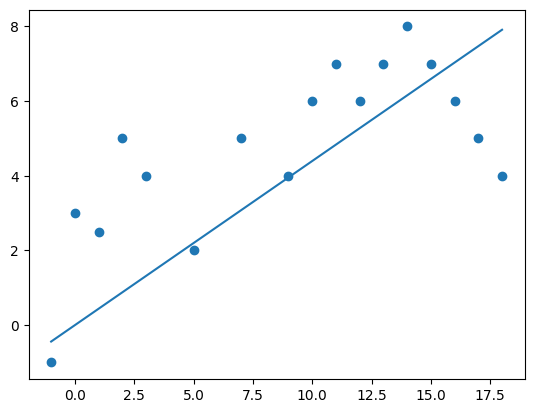

In [ ]:
plt.scatter(x, y)
plt.plot(x, ypred)

In [ ]:
pf2 = PolynomialFeatures(degree=2)
x2 = pf2.fit_transform(x)
x2.shape

(17, 3)

In [ ]:
x

,variable01
0,-1
1,0
2,1
3,2
4,3
5,5
6,7
7,9
8,10
9,11


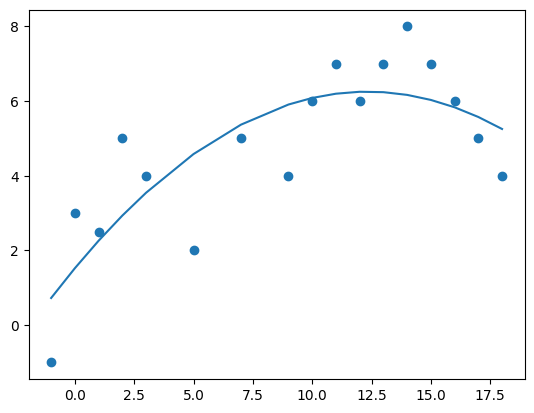

In [ ]:
model2 = sm.OLS(y, x2).fit()
ypred = model2.predict(x2)
plt.scatter(x,y)
plt.plot(x, ypred)

In [ ]:
model2 = sm.OLS(y, x2).fit()
ypred = model2.predict(x2)
plt.scatter(x,y)
plt.plot(x, ypred)

# Univariate Polynomial Regression [Iteration 03]

In [111]:
# Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [112]:
# Create a data disctionary
data = {
    'target': [-1,3,2.5,5,4,2,5,4,6,7,6,7,8,7,6,5,4],
    'variable01': [-1,0,1,2,3,5,7,9,10,11,12,13,14,15,16,17,18],
    'variable02': [-1,0,1,2,3,5,7,-9,10,-11,-12,-13,14,15,-16,17,18],
}

In [113]:
# Create a pandas dataframe
df = pd.DataFrame(data, columns=['target', 'variable01'])

In [114]:
# Separate target and feature
X = df[['variable01']]
Y = df[['target']]

# Train / Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [115]:
X_train

,variable01
9,11
3,2
1,0
10,12
7,9
14,16
2,1
11,13
6,7
16,18


In [116]:
X_test

,variable01
12,14
4,3
5,5
0,-1


In [117]:
# Creation of Polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [118]:
X_train_poly

array([[  1.,  11., 121.],
       [  1.,   2.,   4.],
       [  1.,   0.,   0.],
       [  1.,  12., 144.],
       [  1.,   9.,  81.],
       [  1.,  16., 256.],
       [  1.,   1.,   1.],
       [  1.,  13., 169.],
       [  1.,   7.,  49.],
       [  1.,  18., 324.],
       [  1.,  15., 225.],
       [  1.,  17., 289.],
       [  1.,  10., 100.]])

In [119]:
X_test_poly

array([[  1.,  14., 196.],
       [  1.,   3.,   9.],
       [  1.,   5.,  25.],
       [  1.,  -1.,   1.]])

In [120]:
# Feature Scaling required
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [122]:
X_train_scaled

array([[ 0.        ,  0.15814134, -0.13675415],
       [ 0.        , -1.38373673, -1.23150713],
       [ 0.        , -1.7263763 , -1.26893458],
       [ 0.        ,  0.32946113,  0.0784537 ],
       [ 0.        , -0.18449823, -0.51102867],
       [ 0.        ,  1.01474027,  1.12642236],
       [ 0.        , -1.55505651, -1.25957772],
       [ 0.        ,  0.50078091,  0.31237527],
       [ 0.        , -0.5271378 , -0.81044829],
       [ 0.        ,  1.35737984,  1.76268904],
       [ 0.        ,  0.84342048,  0.8363596 ],
       [ 0.        ,  1.18606005,  1.43519884],
       [ 0.        , -0.01317845, -0.33324828]])

In [123]:
X_test_scaled

array([[ 0.        ,  0.6721007 ,  0.56501058],
       [ 0.        , -1.21241694, -1.18472281],
       [ 0.        , -0.86977737, -1.035013  ],
       [ 0.        , -1.89769609, -1.25957772]])

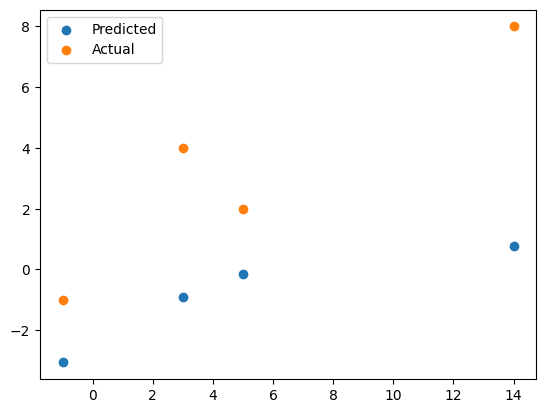

In [125]:
model3 = sm.OLS(Y_train, X_train_scaled).fit()
ypred = model3.predict(X_test_scaled)
#plt.scatter(X, Y)
plt.scatter(X_test, ypred, label='Predicted')
plt.scatter(X_test, Y_test, label='Actual')
plt.legend()

# Univariate Polynomial Regression [Iteration 04]

In [1]:
# CODE IMPLEMENTATION: Polynomial Regression

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures # Polynomial features
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV # Regularization options
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Model evaluation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

In [2]:
# --------------------------------------------------------------------------
# DATA PREPARATION

# Load the dataset and transform it to dataframe
x_raw = 6 * np.random.rand(200, 1) - 3
y_raw = (0.8 * x_raw**2) + (0.9 * x_raw) + 2 + np.random.randn(200,1)

# Load data into a DataFrame
df = pd.DataFrame(np.hstack((x_raw, y_raw)), columns=['Feature01', 'Target'])
df

,Feature01,Target
0,-2.074502,4.604438
1,-1.674525,2.525167
2,2.737908,10.438658
3,-2.034092,4.485696
4,1.669088,5.896517
...,...,...
195,0.579635,2.259024
196,-0.172088,2.071773
197,-0.223849,1.352749
198,-0.637520,2.540208


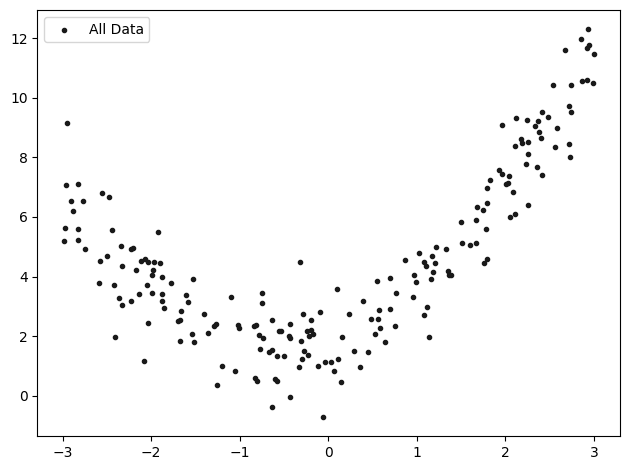

In [3]:
plt.scatter(df['Feature01'], df['Target'], label='All Data', marker='.', color='#191919')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# --------------------------------------------------------------------------
# DATA SPLIT (X, y) & (Train, Test)

# Split the data into features (X) and target (y)
# Option 1: X = df[feature_names_list]
# Option 2:
X = df.drop(columns=["Target"])  # Replace "target" with the actual column name
y = df["Target"]

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

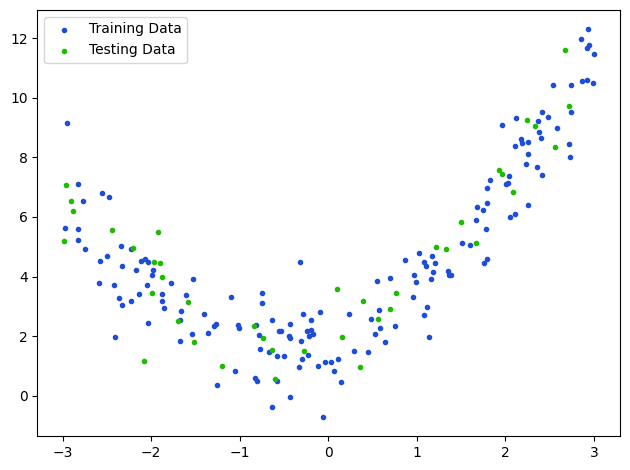

In [6]:
#plt.scatter(df['Feature01'], df['Target'], label='All Data', marker='.', color='#191919')
plt.scatter(X_train, y_train, label='Training Data', marker='.', color='#1D4ED8')
plt.scatter(X_test, y_test, label='Testing Data', marker='.', color='#1fbb00')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Creation of Polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [9]:
print("Original X:")
print(X_train[:5])
print("Polynomial X:")
print(X_train_poly[:5])
print("Scaled X:")
print(X_train_scaled[:5])

Original X:
     Feature01
79   -0.438406
197  -0.223849
38   -0.751657
24   -0.808071
122  -0.433909
Polynomial X:
[[ 1.         -0.43840571  0.19219957]
 [ 1.         -0.22384884  0.0501083 ]
 [ 1.         -0.75165747  0.56498895]
 [ 1.         -0.80807139  0.65297937]
 [ 1.         -0.43390895  0.18827698]]
Scaled X:
[[ 0.         -0.31227848 -1.05950609]
 [ 0.         -0.19007092 -1.11137815]
 [ 0.         -0.49070078 -0.923415  ]
 [ 0.         -0.52283308 -0.89129308]
 [ 0.         -0.30971721 -1.06093808]]


In [20]:
# --------------------------------------------------------------------------
# MODEL TRAINING AND PREDICTION

# Model creation and  training

model01 = LinearRegression()
model02 = LinearRegression()
model03 = LinearRegression()
model04 = ElasticNetCV(alphas=np.logspace(-6,6,100), l1_ratio=np.linspace(0.0, 1.0, 101), cv=5, random_state=36)
from sklearn.linear_model import ElasticNet
model05 = ElasticNet(alpha=1000.0, l1_ratio=0.5)

model01.fit(X_train, y_train)
model02.fit(X_train_poly, y_train)
model03.fit(X_train_scaled, y_train)
model04.fit(X_train_scaled, y_train)
model05.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred01 = model01.predict(X_test)
y_pred02 = model02.predict(X_test_poly)
y_pred03 = model03.predict(X_test_scaled)
y_pred04 = model04.predict(X_test_scaled)
y_pred05 = model04.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 572.4120741542068, tolerance: 0.11448252825808657
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective di

In [24]:
# Predictions DataFrame
df_preds = pd.DataFrame({
    'y_test': y_test,
    'y_pred01': y_pred01,
    'y_pred02': y_pred02,
    'y_pred03': y_pred03,
    'y_pred04': y_pred04,
    'y_pred05': y_pred05,
})
df_preds

,y_test,y_pred01,y_pred02,y_pred03,y_pred04,y_pred05
95,1.007495,3.239077,2.057748,2.057748,2.079560,2.079560
15,3.988978,2.577910,3.199800,3.199800,3.210444,3.210444
30,4.937057,5.691598,4.452951,4.452951,4.454373,4.454373
158,3.133415,2.862886,2.614456,2.614456,2.630781,2.630781
128,7.081459,1.523999,6.589934,6.589934,6.568144,6.568144
115,2.510544,2.754441,2.820579,2.820579,2.834897,2.834897
69,6.823152,6.424343,7.195428,7.195428,7.171864,7.171864
170,0.970537,4.746903,2.293342,2.293342,2.314149,2.314149
174,1.494385,4.136046,1.722078,1.722078,1.747728,1.747728
45,3.578790,4.488267,1.972360,1.972360,1.995955,1.995955


In [21]:
model04.alpha_

np.float64(0.01)

In [22]:
model04.l1_ratio_

np.float64(0.0)

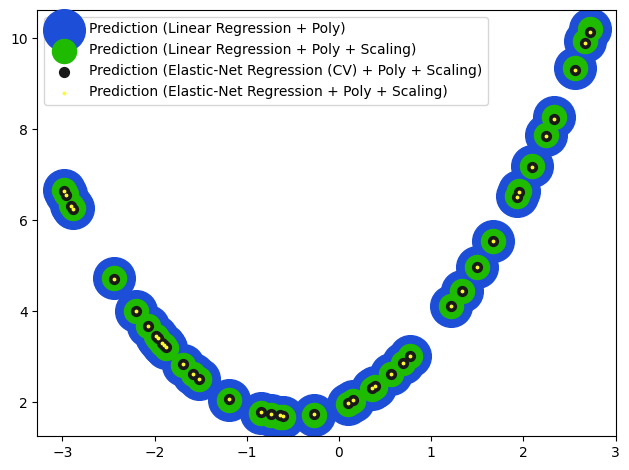

In [37]:
#plt.scatter(df['Feature01'], df['Target'], label='All Data', marker='.', color='#191919')
#plt.scatter(X_train, y_train, label='Training Data', marker='.', color='#1D4ED8')
#plt.scatter(X_test, y_test, label='Testing Data', marker='.', color='#1fbb00', s=100)
#plt.scatter(X_test, y_pred01, label="Prediction (Linear Regression)", color="#ff6930", s=3)
plt.scatter(X_test, y_pred02, label="Prediction (Linear Regression + Poly)", color="#1D4ED8", s=900)
plt.scatter(X_test, y_pred03, label="Prediction (Linear Regression + Poly + Scaling)", color="#1fbb00", s=300)
plt.scatter(X_test, y_pred04, label="Prediction (Elastic-Net Regression (CV) + Poly + Scaling)", color="#191919", s=50)
plt.scatter(X_test, y_pred05, label="Prediction (Elastic-Net Regression + Poly + Scaling)", color="#fff930", s=3)
plt.legend()
plt.tight_layout()
plt.show()